w1 best male: 
 0.005306122448979591
least error male: 
 0.3926625810674121
w1 best female: 
 0.005306122448979591
least error female: 
 0.45939478458050026
numiter = 1:
 (-727.2681457142858, array([0.1]), array([34461.36708571]))
numiter = 2:
 (5582027.121111699, array([ 1.00000000e-01, -7.27268146e+02]), array([3.44613671e+04, 2.03009436e+12]))
numiter = 3:
 (-42843622676.73122, array([ 1.00000000e-01, -7.27268146e+02,  5.58202712e+06]), array([3.44613671e+04, 2.03009436e+12, 1.19592711e+20]))
numiter = 100:
 (nan, array([ 1.00000000e-001, -7.27268146e+002,  5.58202712e+006,
       -4.28436227e+010,  3.28836812e+014, -2.52391470e+018,
        1.93717528e+022, -1.48683632e+026,  1.14118855e+030,
       -8.75894199e+033,  6.72273347e+037, -5.15988637e+041,
        3.96035741e+045, -3.03968532e+049,  2.33304368e+053,
       -1.79067642e+057,  1.37439434e+061, -1.05488618e+065,
        8.09654708e+068, -6.21432682e+072,  4.76967001e+076,
       -3.66085542e+080,  2.80980915e+084, -2.1566

C:\Users\Dan\anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-1-cf960b66b4f1>:8: RuntimeWarning: overflow encountered in square
  return np.mean((np.multiply(w,x)-y)**2)
<ipython-input-1-cf960b66b4f1>:126: RuntimeWarning: invalid value encountered in double_scalars
  w = w - rate*grad  # go a certain distance opposite to the slope (downward)


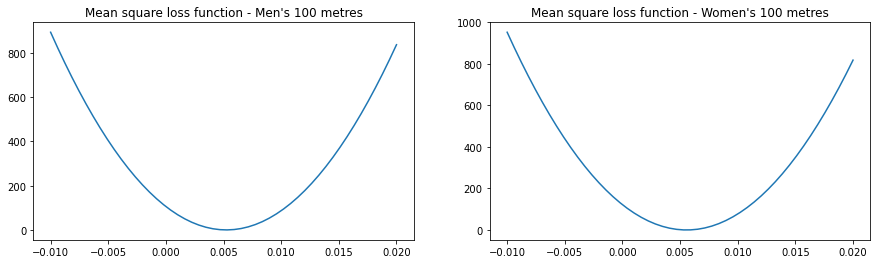

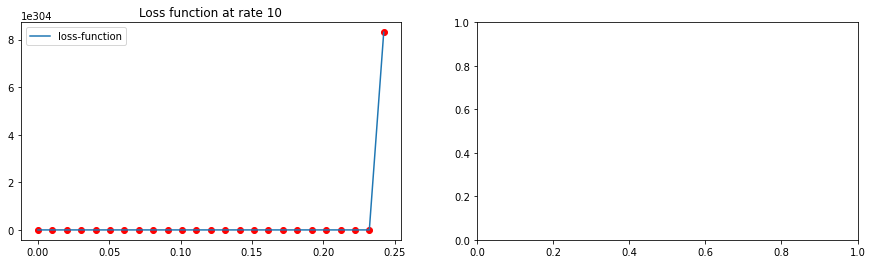

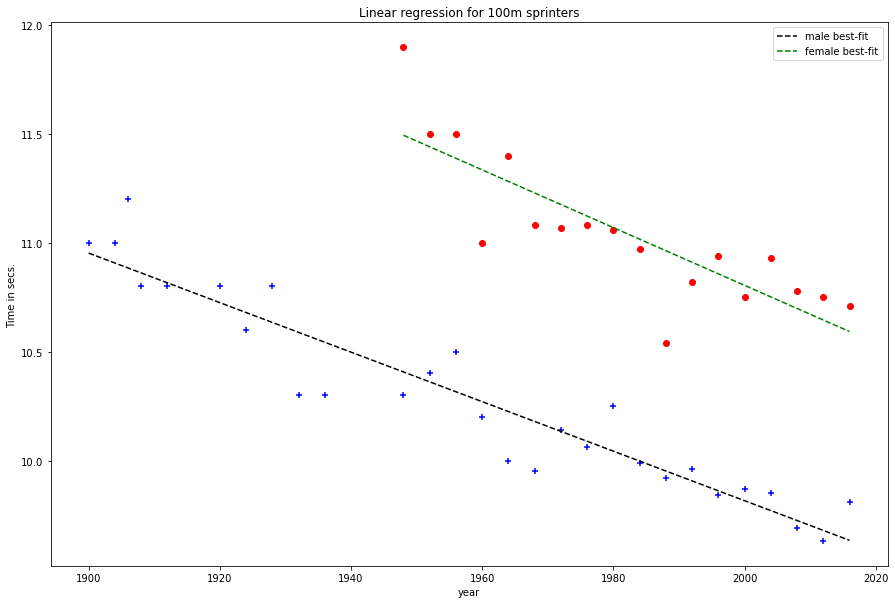

In [1]:
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
import numpy as np # numerical computation packages in python
import matplotlib.pyplot as plt # plotting routines
# plotting library

def mse(w, x, y):
    return np.mean((np.multiply(w,x)-y)**2)
def rmse(w, x, y):
    return np.sqrt(mse(w, x, y))
def l1e(w, x, y):
    return np.mean(np.abs(np.multiply(w,x)-y))

# We had defined the mse/rmse function for a single value of the unknown slope w.
# Here we define it to take an array of w values as input
def ar_mse(w, x, y):
    return np.array([mse(wi,x,y) for wi in w])
def ar_rmse(w, x, y):
    return np.array([rmse(wi,x,y) for wi in w])
def ar_l1e(w, x, y):
    return np.array([l1e(wi,x,y) for wi in w])

def loss_slope_w1(w1, Xtrain, ytrain):
    return (2/len(Xtrain))*(np.dot(w1*Xtrain - ytrain, Xtrain))

def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1
#

# men's 100m sprint times
olympics100m = np.asarray([1900,11,
1904,11,
1906,11.2,
1908,10.8,
1912,10.8,
1920,10.8,
1924,10.6,
1928,10.8,
1932,10.3,
1936,10.3,
1948,10.3,
1952,10.4,
1956,10.5,
1960,10.2,
1964,10,
1968,9.95,
1972,10.14,
1976,10.06,
1980,10.25,
1984,9.99,
1988,9.92,
1992,9.96,
1996,9.84,
2000,9.87,
2004,9.85,
2008,9.69,
2012,9.63,
2016,9.81]);

# women's 100m sprint times
olympics100f=np.asarray([
1948, 11.90,
1952, 11.50,
1956, 11.50,
1960, 11.00,
1964, 11.40,
1968, 11.08,
1972, 11.07,
1976, 11.08,
1980, 11.06,
1984, 10.97,
1988, 10.54,
1992, 10.82,
1996, 10.94,
2000, 10.75,
2004, 10.93,
2008, 10.78,
2012, 10.75,
2016, 10.71])

def denny_logistic_m(year):
    (mn, mx, tof, k) = (9.44, 10.3, 1972, .063) # denny  10.330 (10.165 10.495) 9.439 0.063 1971.65
    speed = 3.6*(mn + (mx - mn)/(1 + np.exp(-k*(year - tof))))
    return speed
def denny_logistic_f(year): # denny 9.297 (9.222 9.373) 8.277 0.109 1963.27
    (mn, mx, tof, k) = (8.28, 9.3, 1963, .11) # denny 9.439
    speed = 3.6*(mn + (mx - mn)/(1 + np.exp(-k*(year - tof))))
    return speed

odate_m = olympics100m[::2]
odate_f = olympics100f[::2]
taxis = np.linspace(1890, 2050, 100)
otime_m = olympics100m[1::2]
otime_f = olympics100f[1::2]

wlims_m = np.linspace(-0.01,0.02,50)
wlims_f = np.linspace(-0.01,0.02,50)
fig, ax = plt.subplots(figsize=(15,4),nrows=1, ncols=2)
loss_m = ar_mse(wlims_m, odate_m, otime_m)
loss_f = ar_mse(wlims_f, odate_f, otime_f)
ax[0].plot(wlims_m,loss_m)
ax[0].set(title="Mean square loss function - Men's 100 metres")
ax[1].plot(wlims_f,loss_f)
ax[1].set(title="Mean square loss function - Women's 100 metres")

wbest_m, least_error_m = (wlims_m[np.argmin(ar_mse(wlims_m, odate_m, otime_m))],np.min(ar_mse(wlims_m, odate_m, otime_m)))
print("w1 best male: \n", wbest_m)
print("least error male: \n", least_error_m)
wbest_f, least_error_f = (wlims_f[np.argmin(ar_mse(wlims_f ,odate_f, otime_f))],np.min(ar_mse(wlims_f, odate_f, otime_f)))
print("w1 best female: \n", wbest_f)
print("least error female: \n", least_error_f)

def gradientdescent0(initialweight, X, y, rate, numiter):
    whistory = []
    msehistory = []
    w = initialweight
    for i in range(numiter):
        loss = mse(w, X, y)
        whistory.append(w)
        msehistory.append(loss)
        grad = loss_slope_w1(w, X, y)
        w = w - rate*grad  # go a certain distance opposite to the slope (downward)
    return w, np.asarray(whistory), np.asarray(msehistory)

print('numiter = 1:\n', gradientdescent0(0.1, odate_m, otime_m, .001, 1))
print('numiter = 2:\n', gradientdescent0(0.1, odate_m, otime_m, .001, 2))
print('numiter = 3:\n', gradientdescent0(0.1, odate_m, otime_m, .001, 3))
print('numiter = 100:\n', gradientdescent0(0.1, odate_m, otime_m, .001, 100))

fig2, ax2 = plt.subplots(figsize=(15,4),nrows=1, ncols=2)
wlims = np.linspace(0,1,100)
t = gradientdescent0(-5., odate_m, otime_m, .2, 100)
ax2[0].plot(wlims,t[2], label='loss-function')
ax2[0].scatter(wlims, t[2], c='r')
ax2[0].set(title='Loss function at rate 10')
ax2[0].legend()

w0_m, w1_m = linear_fit(odate_m, otime_m)
print("w0 male: \n", w0_m)
print("w1 male: \n", w1_m)

w0_f, w1_f = linear_fit(odate_f, otime_f)
print("w0 female: \n", w0_f)
print("w1 female: \n", w1_f)

fig3, ax3 = plt.subplots(figsize=(15,10),nrows=1, ncols=1)
ax3.scatter(odate_m, otime_m, c='b', marker = '+')
ax3.scatter(odate_f, otime_f, c='r', marker = 'o')
ax3.plot(odate_m, 32.56269420403262 - (0.011373581258668148 * odate_m), '--', c='k', label='male best-fit')
ax3.plot(odate_f, 37.326821465440354 - (0.013261093911254804 * odate_f), '--', c='g', label='female best-fit')
ax3.set(xlabel="year", ylabel="Time in secs.", title="Linear regression for 100m sprinters")
ax3.legend()
# ax[1].scatter(odate_m, (360/otime_m),c='b', marker ='+')
# ax[1].scatter(odate_f, (360/otime_f),c='r', marker ='o')
# ax[1].plot(taxis, denny_logistic_m(taxis), c='b', ls = "-.")
# ax[1].plot(taxis, denny_logistic_f(taxis), c='r', ls = "-.")
# ax[1].set(xlabel="year", ylabel="Speed in km/hr.")
# ax[1].set(title = "speed of Olympics sprinters")